<a href="https://colab.research.google.com/github/mnourb/appI/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
alpha = 1 / 137  # Fine structure constant
m_Z = 91.1876  # Z boson mass in GeV
Gamma_Z = 2.4952  # Z boson width in GeV
sin2_theta_w_default = 0.231  # Default weak mixing angle
cos2_theta_w_default = 1 - sin2_theta_w_default

In [ ]:
# Cross-section and asymmetry for e+e- -> f f-bar
def compute_factors(s, I3_f, Q_f, sin2_theta_w):
   """Compute the F factors for the cross-section and asymmetry."""
   cos2_theta_w = 1 - sin2_theta_w
   a = Q_f
   b1 = s * (1 / 2 - sin2_theta_w) * (I3_f - sin2_theta_w * Q_f) / (sin2_theta_w * cos2_theta_w)
   b2 = s * (-Q_f * (1 / 2 - sin2_theta_w) / cos2_theta_w)
   c = s - m_Z**2
   d = m_Z * Gamma_Z
   FLR = a**2 + (b1 * (b1 + 2 * a * c)) / (c**2 + d**2)
   FRL = a**2 + (b2 * (b2 + 2 * a * c)) / (c**2 + d**2)
   return FLR, FRL

def sigma(s, I3_f, Q_f, sin2_theta_w=sin2_theta_w_default):
   """Compute the total cross-section."""
   FLR, FRL = compute_factors(s, I3_f, Q_f, sin2_theta_w)
   F_total = FLR + FRL
   return (np.pi * alpha**2 / (3 * s)) * F_total

def asymmetry(s, I3_f, Q_f, sin2_theta_w=sin2_theta_w_default):
   """Compute the asymmetry."""
   FLR, FRL = compute_factors(s, I3_f, Q_f, sin2_theta_w)
   F_total = FLR + FRL
   return 0.75 * (FLR - FRL) / F_total

In [ ]:
# Define particle properties
particles = {
   "muons": {"I3_f": -1 / 2, "Q_f": -1, "color": "black"},
   "up quark": {"I3_f": 1 / 2, "Q_f": 2 / 3, "color": "blue"},
   "down quark": {"I3_f": -1 / 2, "Q_f": -1 / 3, "color": "green"},
}

In [ ]:
# Define energy range
ecm = np.linspace(30, 200, 500)  # Center-of-mass energy in GeV
s_values = ecm**2  # Square of energy

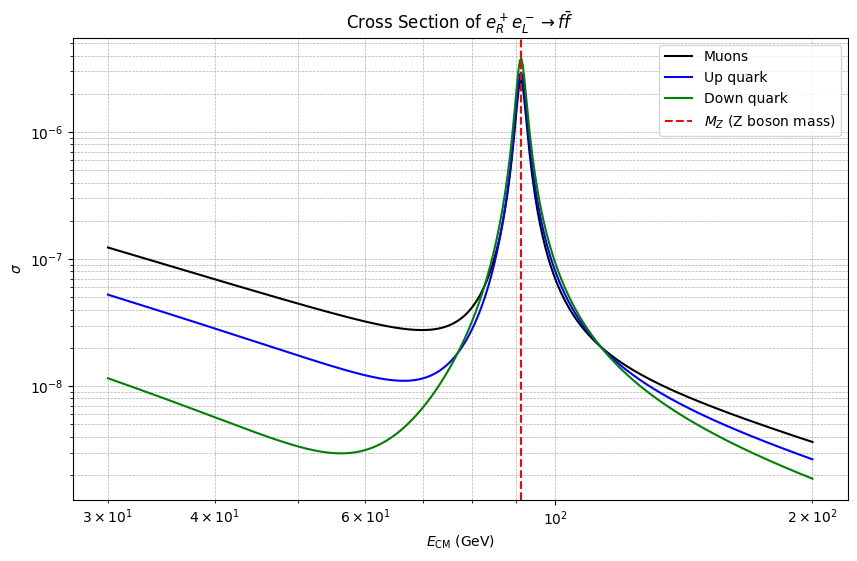

In [ ]:
# Plot cross-sections
plt.figure(figsize=(10, 6))
for name, props in particles.items():
   sigma_values = sigma(s_values, props["I3_f"], props["Q_f"])
   plt.loglog(ecm, sigma_values, label=name.capitalize(), color=props["color"])

plt.axvline(m_Z, color="red", linestyle="--", label=r"$M_Z$ (Z boson mass)")
plt.xlabel(r"$E_\mathrm{CM}$ (GeV)")
plt.ylabel(r"$\sigma$")
plt.title(r"Cross Section of $e^+_Re^-_L \to f\bar{f}$")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

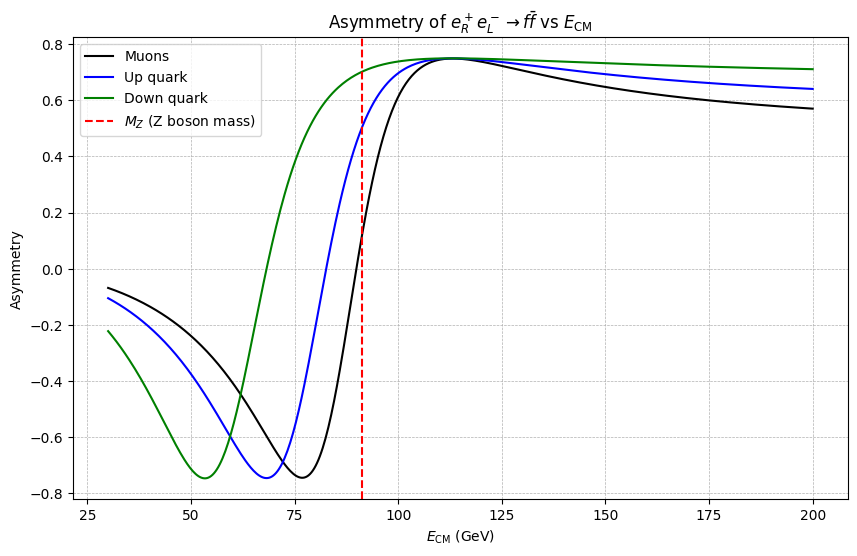

In [ ]:
# Plot asymmetries vs energy
plt.figure(figsize=(10, 6))
for name, props in particles.items():
   asymmetry_values = asymmetry(s_values, props["I3_f"], props["Q_f"])
   plt.plot(ecm, asymmetry_values, label=name.capitalize(), color=props["color"])

plt.axvline(m_Z, color="red", linestyle="--", label=r"$M_Z$ (Z boson mass)")
plt.xlabel(r"$E_\mathrm{CM}$ (GeV)")
plt.ylabel("Asymmetry")
plt.title(r"Asymmetry of $e^+_Re^-_L \to f\bar{f}$ vs $E_\mathrm{CM}$")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

<ipython-input-20-afddb4fb7dcb>:6: RuntimeWarning: divide by zero encountered in scalar divide
  b1 = s * (1 / 2 - sin2_theta_w) * (I3_f - sin2_theta_w * Q_f) / (sin2_theta_w * cos2_theta_w)
<ipython-input-20-afddb4fb7dcb>:24: RuntimeWarning: invalid value encountered in scalar divide
  return 0.75 * (FLR - FRL) / F_total
<ipython-input-20-afddb4fb7dcb>:7: RuntimeWarning: divide by zero encountered in scalar divide
  b2 = s * (-Q_f * (1 / 2 - sin2_theta_w) / cos2_theta_w)
<ipython-input-20-afddb4fb7dcb>:24: RuntimeWarning: invalid value encountered in scalar subtract
  return 0.75 * (FLR - FRL) / F_total


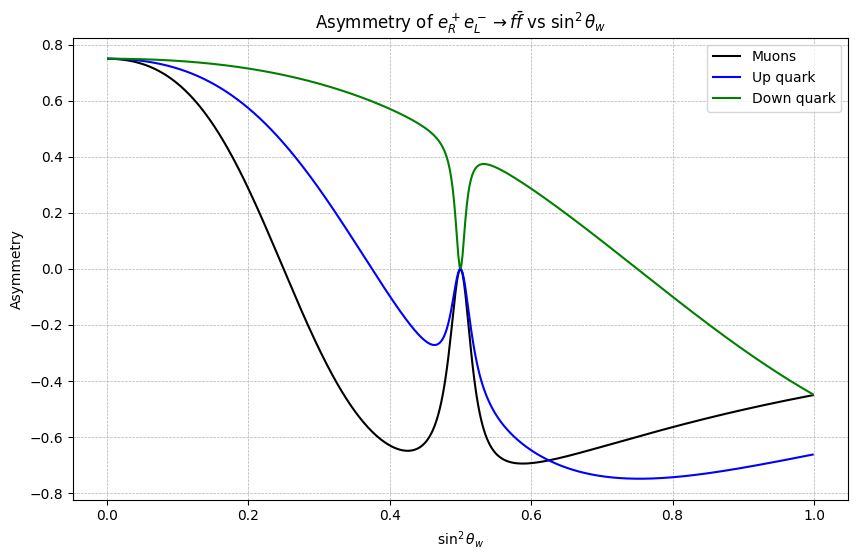

In [ ]:
# Plot asymmetry vs sin2_theta_w
sin2_theta_w_range = np.linspace(0.0, 1.0, 500)
plt.figure(figsize=(10, 6))
for name, props in particles.items():
   asymmetry_values = [
       asymmetry(m_Z**2, props["I3_f"], props["Q_f"], sin2_theta_w)
       for sin2_theta_w in sin2_theta_w_range
   ]
   plt.plot(sin2_theta_w_range, asymmetry_values, label=name.capitalize(), color=props["color"])

plt.xlabel(r"$\sin^2\theta_w$")
plt.ylabel("Asymmetry")
plt.title(r"Asymmetry of $e^+_Re^-_L \to f\bar{f}$ vs $\sin^2\theta_w$")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()